# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

## Подключаем библиотеки. Загружаем данные

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation, MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
geo = pd.read_excel('geo.xlsx')
data = geo.drop("comment_class", axis=1)
dataP = geo[geo.comment_class > 0].drop("comment_class", axis=1)
dataN = geo[geo.comment_class < 0].drop("comment_class", axis=1)

## Рисуем расположение за и против

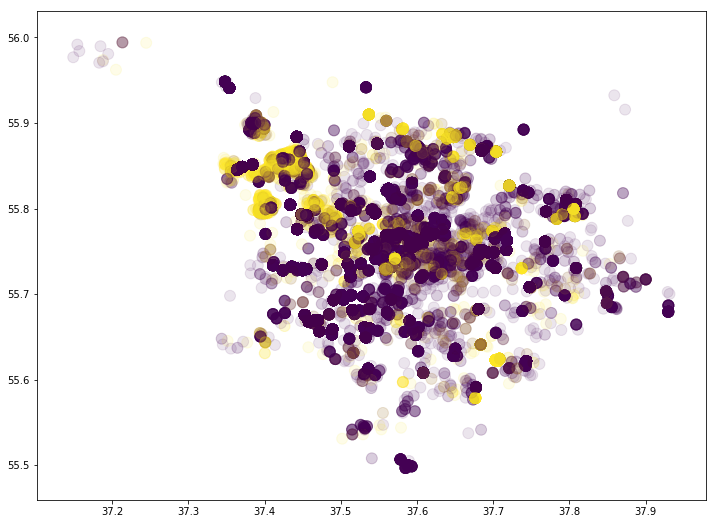

In [2]:
geo = geo.sample(frac=1).reset_index(drop=True)
plt.scatter(geo.x, geo.y, c=geo.comment_class, s=120, alpha=0.1)

## Вычисляем оптимальное число кластеров

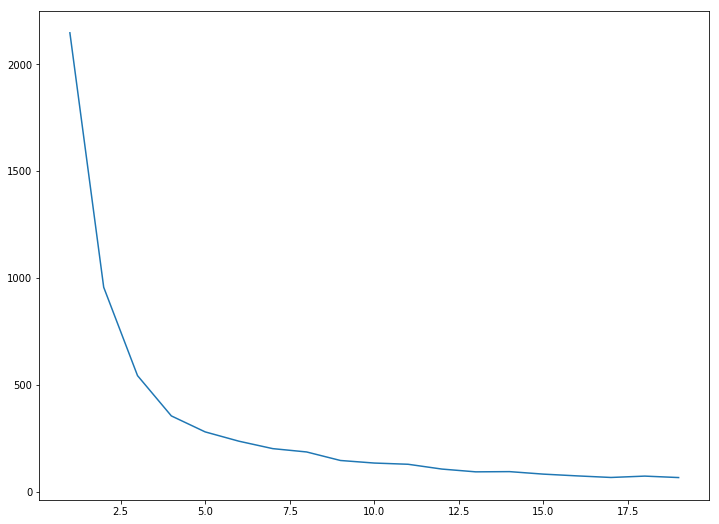

In [3]:
k_inertia = []
ks = range(1,20)

for k in ks:
    clf_kmeans = MiniBatchKMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data)
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)

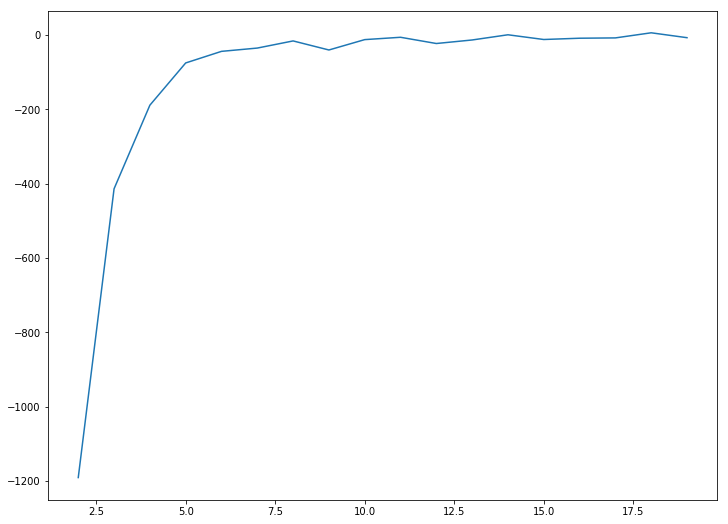

In [4]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

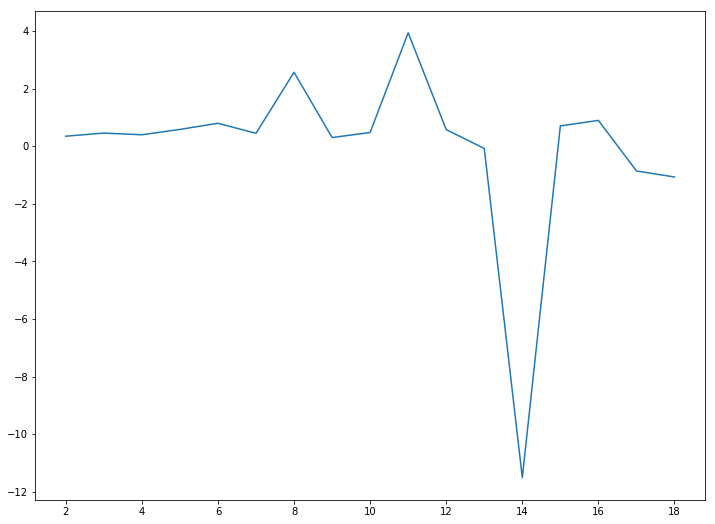

In [5]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

In [6]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

14

## Теперь рисуем кластеры, По всем вместе и отдельно по голосам

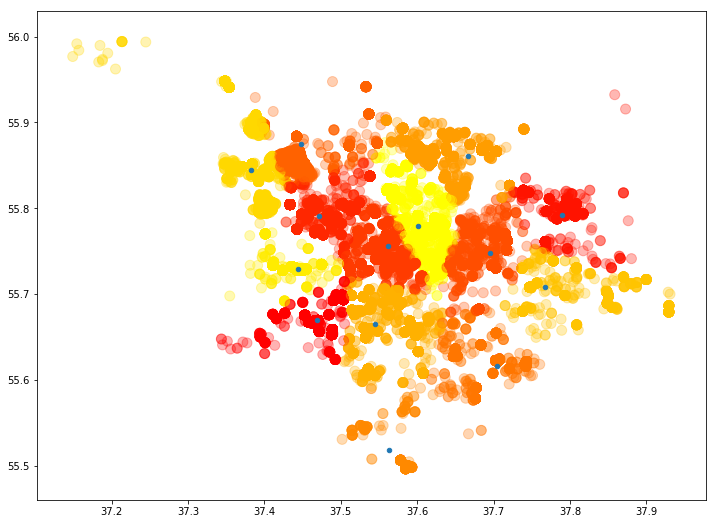

In [7]:
clf_kmeans = MiniBatchKMeans(n_clusters=14, random_state=0)
clusters = clf_kmeans.fit_predict(data)
plt.scatter(data.x, data.y, c=clusters, cmap='autumn',  s=100, alpha=0.3)
centers = clf_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=20)

### Положительные голоса

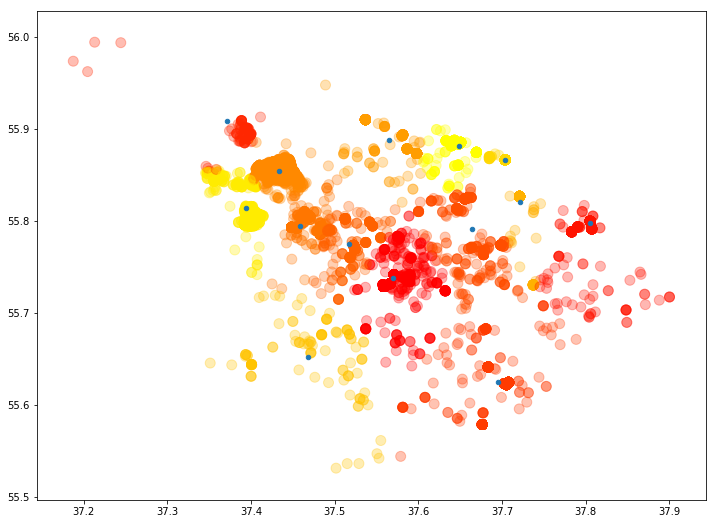

In [8]:
clf_kmeans = MiniBatchKMeans(n_clusters=14, random_state=0)
clusters = clf_kmeans.fit_predict(dataP)
plt.scatter(dataP.x, dataP.y, c=clusters, cmap='autumn',  s=100, alpha=0.3)
centers = clf_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=20)

## Негативные голоса

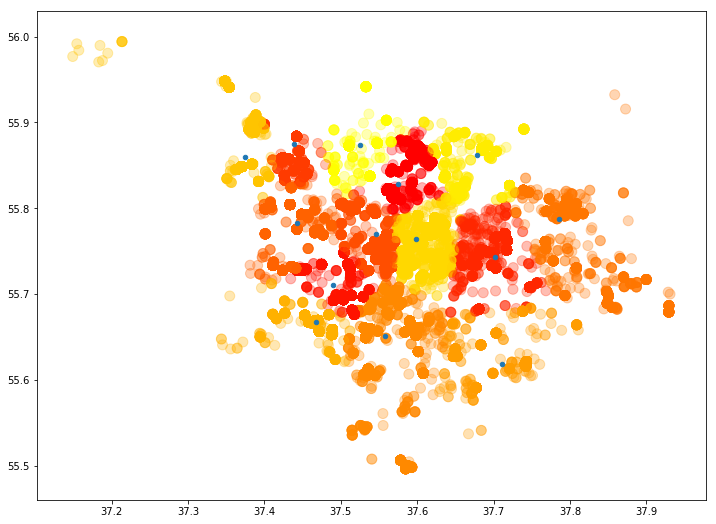

In [9]:
clf_kmeans = MiniBatchKMeans(n_clusters=14, random_state=0)
clusters = clf_kmeans.fit_predict(dataN)
plt.scatter(dataN.x, dataN.y, c=clusters, cmap='autumn',  s=100, alpha=0.3)
centers = clf_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=20)

## Наиболее активные в голосовании районы

In [10]:
alg = DBSCAN(eps = 0.02, leaf_size=100, n_jobs=-1, min_samples=50)
clusters = alg.fit_predict(data)


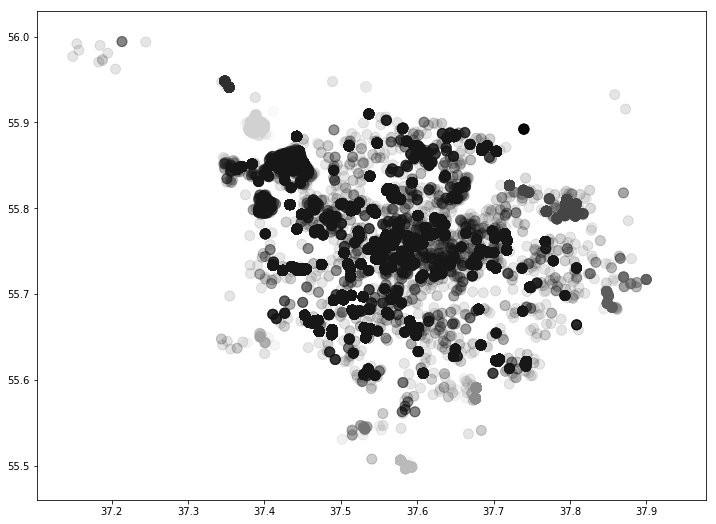

In [14]:
plt.scatter(data.x, data.y, c=clusters, cmap='gray', s=100, alpha=0.1)